In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
class LogisticRegression:
    
    def __init__(self):
        self.weights = 0
        self.bias = 0
        
    def fit(self, X, y, α=0.001, max_iter=10**5, tols=1e-8):
        m, n = X.shape
        
        # number of classes in the target
        k = len(np.unique(y))
        
        # Initialize the weights of the k classifiers
        self.weights = np.array([np.random.rand(n) for _ in range(k)])
        self.bias = np.zeros(k)
        
        # Gradient descent
        for k_ in range(k):
            print("k = {}".format(k_))
            y_temp = y.copy()
            y_temp = np.array([1 if y_i==k_ else 0 for y_i in y])
            
            old_weights = self.weights[k_]
            old_bias = self.bias[k_]
            for iteration in range(max_iter):
                new_weights = old_weights - α * (1/m) * np.dot(X.T, (self.__sigmoid(np.dot(X, old_weights) + old_bias) - y_temp))
                new_bias = old_bias - α * (1/m) * np.sum(self.__sigmoid(np.dot(X, old_weights) + old_bias) - y_temp)                
                
                # Stopping criterion
                if (np.linalg.norm(new_weights - old_weights) > tols) and (np.abs(new_bias - old_bias) > tols):
                    old_weights = new_weights
                    old_bias = new_bias

                else:
                    print("Converged after {} iterations.".format(iteration))
                    break
                
            # Best wieghts and bias for class k_
            self.weights[k_] = new_weights
            self.bias[k_] = new_bias
                
                
    def predict(self, x_test):
        predicted = []
        scores = []
        for x_test_i in x_test:
            scores = []
            for k_ in range(len(self.weights)):
                scores.append(self.__sigmoid(np.dot(x_test_i, self.weights[k_]) + self.bias[k_]))
            predicted.append(scores)
            
        return np.array([np.argmax(predicted_i) for predicted_i in predicted])
        
        
        #np.array([[self.__sigmoid(np.dot(self.weights[k_], x_test_i) + self.bias[k_]) for k_ in range(self.weights)] for x_test_i in x_test])
    
    def accuracy_score(self, y_t, y_p):
        return np.sum(y_t == y_p) / len(y_t)
    
    def __sigmoid(self,z):
        return 1 / (1 + np.exp(-z))

# Iris data set

In [3]:
# Load the data
from sklearn.datasets import load_iris
iris_dataset = load_iris()
X, y = iris_dataset.data, iris_dataset.target # Data has 4 features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_pd = pd.DataFrame(X, columns=iris_dataset.feature_names)
X_pd['target'] = y
X_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Categories of the iris dataset
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Fit the parameters to the data

In [5]:
logit = LogisticRegression()
logit.fit(X_train, y_train, α=0.00005)

print(logit.weights, logit.bias)

k = 0
Converged after 7510 iterations.
k = 1
Converged after 9399 iterations.
k = 2
[[-0.16806352  0.24515334 -0.26346542  0.60627894]
 [-0.29782622 -0.04077949  0.24419964  0.28756921]
 [-0.60966953 -0.44636337  0.90605241  0.57216996]] [-0.16816608 -0.11226815 -0.23986156]


### Predict

In [6]:
print(logit.predict(X_test) == y_test)

[False False  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True False False]


### Score

In [7]:
logit.accuracy_score(y_test, logit.predict(X_test))

0.7666666666666667

### Scikit-learn implementation

In [8]:
from sklearn.linear_model import LogisticRegression as sklearnLogit

clf = sklearnLogit(random_state=0).fit(X_train, y_train)
accuracy_score(clf.predict(X_test), y_test)

0.9666666666666667

# MNIST Digits Classification

In [9]:
from sklearn.datasets import load_digits

digits_data = load_digits()
X, y = digits_data.data, digits_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(digits_data.data.shape) # Number of datapoints, 64 features, 8x8 image

(1797, 64)


### Fit the parameters of logistic regression to the data 

In [10]:
logit = LogisticRegression()
logit.fit(X_train, y_train, α=0.0001,tols=0.0000005)

k = 0
Converged after 5421 iterations.
k = 1
Converged after 19193 iterations.
k = 2
Converged after 2247 iterations.
k = 3
Converged after 1489 iterations.
k = 4
Converged after 1518 iterations.
k = 5
Converged after 2663 iterations.
k = 6
Converged after 1421 iterations.
k = 7
Converged after 2157 iterations.
k = 8
Converged after 22997 iterations.
k = 9
Converged after 1745 iterations.


### Make a prediction

<IPython.core.display.Javascript object>


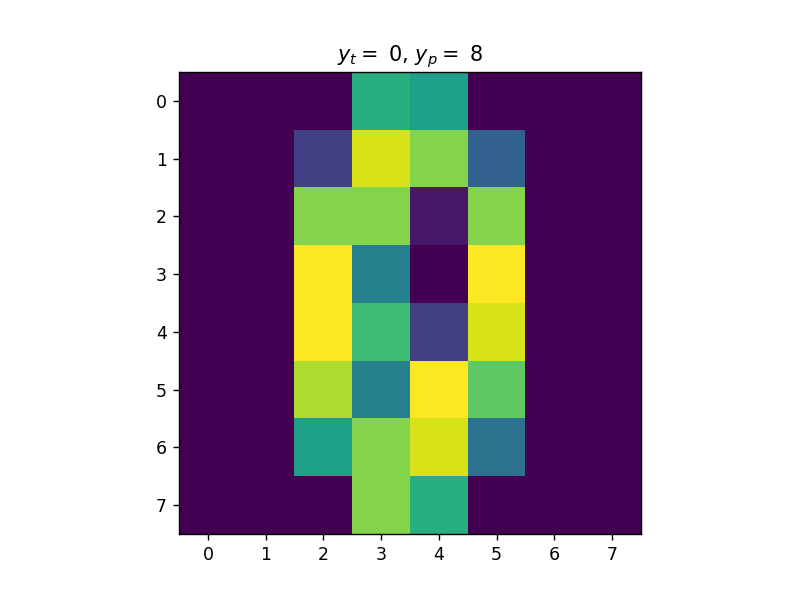

Text(0.5, 1.0, '$y_t =$ 0, $y_p =$ 8')

In [11]:
plt.figure()
index= 13
plt.imshow(X_test[index].reshape(8,8)) # Print image
plt.title(r'$y_t =$ {}, $y_p =$ {}'.format(y_test[index],logit.predict([X_test[index]])[0])) # Make prediction

### Score

In [12]:
logit.accuracy_score(y_test, logit.predict(X_test))

0.4083333333333333

Our logistic regression implementation doesn't seem to be able to capture the structure of the data too well.

### Scikit-learn

In [13]:
clf = sklearnLogit(random_state=0).fit(X_train, y_train)
accuracy_score(clf.predict(X_test), y_test)

C:\Users\tonba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9527777777777777